# ALS Grid Search Visualization

This notebook loads the latest `als_grid_*.json` from `artifacts/metrics/` and visualizes RMSE and Precision@10 across the grid.



In [1]:
from pathlib import Path
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
metrics_dir = Path("../artifacts/metrics")

# Find latest grid json
candidates = sorted(metrics_dir.glob("als_grid_*.json"))
if not candidates:
    raise FileNotFoundError("No als_grid_*.json found in ../artifacts/metrics. Run train_als first.")

latest = candidates[-1]
with open(latest) as f:
    grid = json.load(f)

grid_results = grid["grid_results"]
rows = []
for entry in grid_results:
    params = entry["params"]
    mets = entry["metrics"]
    rows.append({
        "rank": params.get("rank"),
        "regParam": params.get("regParam"),
        "rmse": mets.get("rmse"),
        "precision_at_10": mets.get("precision@k"),
        "ndcg_at_10": mets.get("ndcg@k"),
    })

df = pd.DataFrame(rows)
print(f"Loaded {len(df)} candidates from {latest.name}")
df


Loaded 9 candidates from als_grid_20251021T194249Z.json


,rank,regParam,rmse,precision_at_10,ndcg_at_10
0,32,0.05,1.538615,0.797897,0.859348
1,32,0.10,1.346179,0.797990,0.862528
2,32,0.20,1.274171,0.798036,0.864356
3,50,0.05,1.463670,0.797931,0.860174
4,50,0.10,1.326343,0.798022,0.863311
5,50,0.20,1.268404,0.798071,0.864860
6,64,0.05,1.442458,0.797948,0.860441
7,64,0.10,1.321174,0.798043,0.863487
8,64,0.20,1.267354,0.798055,0.865180


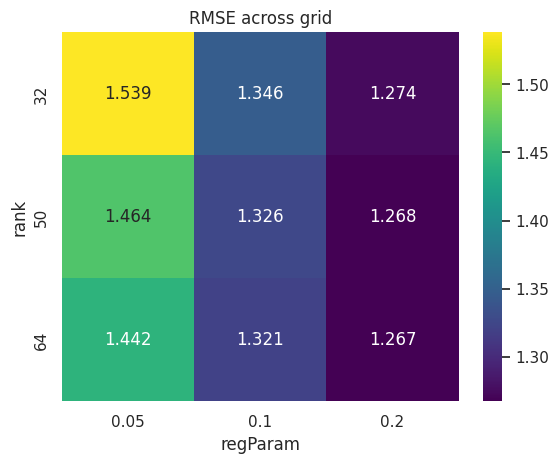

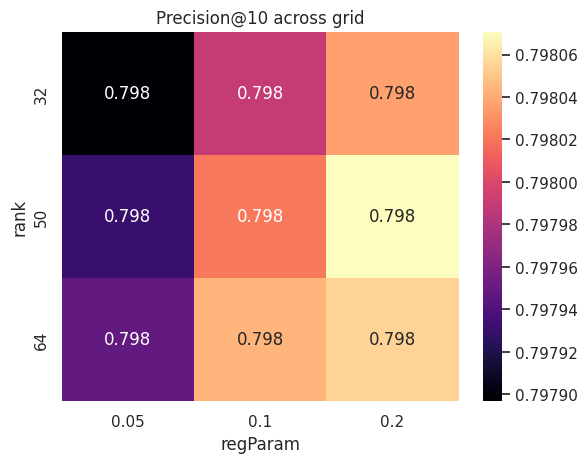

In [3]:
sns.set_theme(style="whitegrid")

# Heatmap: RMSE by (rank, regParam)
piv_rmse = df.pivot_table(index="rank", columns="regParam", values="rmse")
sns.heatmap(piv_rmse, annot=True, fmt=".3f", cmap="viridis")
plt.title("RMSE across grid")
plt.ylabel("rank")
plt.xlabel("regParam")
plt.show()

# Heatmap: Precision@10 by (rank, regParam)
piv_prec = df.pivot_table(index="rank", columns="regParam", values="precision_at_10")
sns.heatmap(piv_prec, annot=True, fmt=".3f", cmap="magma")
plt.title("Precision@10 across grid")
plt.ylabel("rank")
plt.xlabel("regParam")
plt.show()


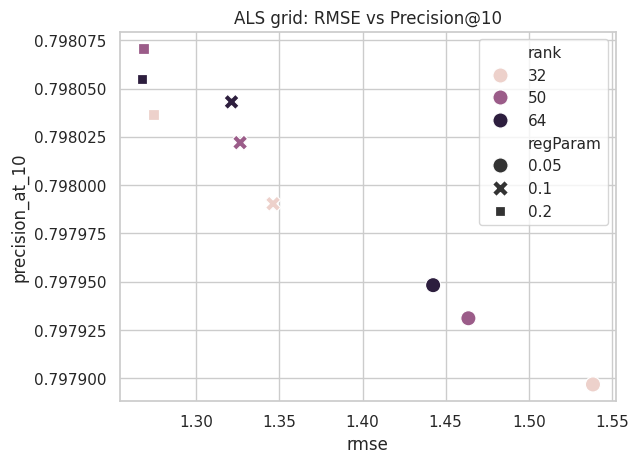

{'params': {'rank': 64, 'regParam': 0.2},
 'metrics': {'rmse': 1.2673541509237582,
  'precision@k': 0.7980549504401927,
  'ndcg@k': 0.8651797995120869}}

In [4]:
# Scatter: RMSE vs Precision@10
ax = sns.scatterplot(data=df, x="rmse", y="precision_at_10", hue="rank", style="regParam", s=120)
plt.title("ALS grid: RMSE vs Precision@10")
plt.show()

# Show best from JSON
best = grid.get("best", {})
best


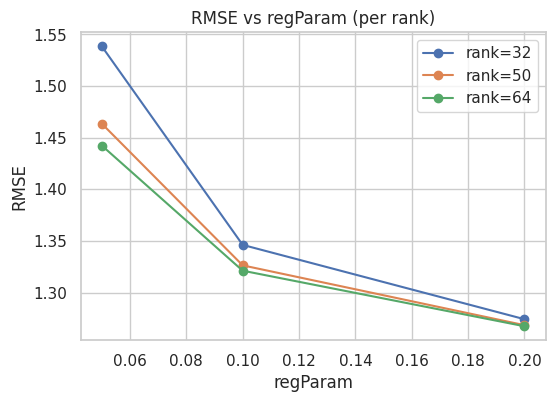

In [5]:
plt.figure(figsize=(6,4))
for rank, sub in df.groupby("rank"):
    plt.plot(sub["regParam"], sub["rmse"], marker="o", label=f"rank={rank}")
plt.xlabel("regParam")
plt.ylabel("RMSE")
plt.title("RMSE vs regParam (per rank)")
plt.legend()
plt.show()
